In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Clustering, Decomposition and Normalization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
phychem = pd.read_csv('raw/physical_chemical.csv')

# Show random rows
phychem.sample(5)

,Punto,DBO,DBQ,Fosforo,Nitrogeno,Oxigeno,Turbidez,Coliformes,Zona
6,C,3.90,20,1,0.5,92.30,0.880,3500,Rural
3,B,43.52,74,1,0.7,99.20,4.400,6300,Urbano
7,C,10.52,20,1,0.5,91.80,2.370,4100,Rural
4,B,45.88,78,1,1.5,99.20,5.630,7000,Urbano
8,C,7.21,20,1,0.5,92.05,1.625,3800,Rural


In [3]:
# Remove phosphorus as it provides no information
phychem.drop('Fosforo', axis=1, inplace=True)

In [4]:
# Translate columns
phychem.columns = ['Site', 'COD', 'BOD', 'Nitrogen', 'Dissolved Oxygen', 'Turbidity', 'Total Coliforms', 'Zone']

# Numerical columns
num_columns = ['BOD', 'Nitrogen', 'Dissolved Oxygen', 'Total Coliforms', 'Turbidity']
# Subset columns of interest
num_phychem = phychem[num_columns]

# Scale dataset
scaled_phychem = pd.DataFrame(data=StandardScaler().fit_transform(num_phychem.values), columns=num_phychem.columns)

# Add Site to dataset
scaled_phychem['Site'] = phychem['Site']

# Set style
sns.set_style("darkgrid")

Text(0.5, 0.98, 'Physico-chemical parameters pairplot')

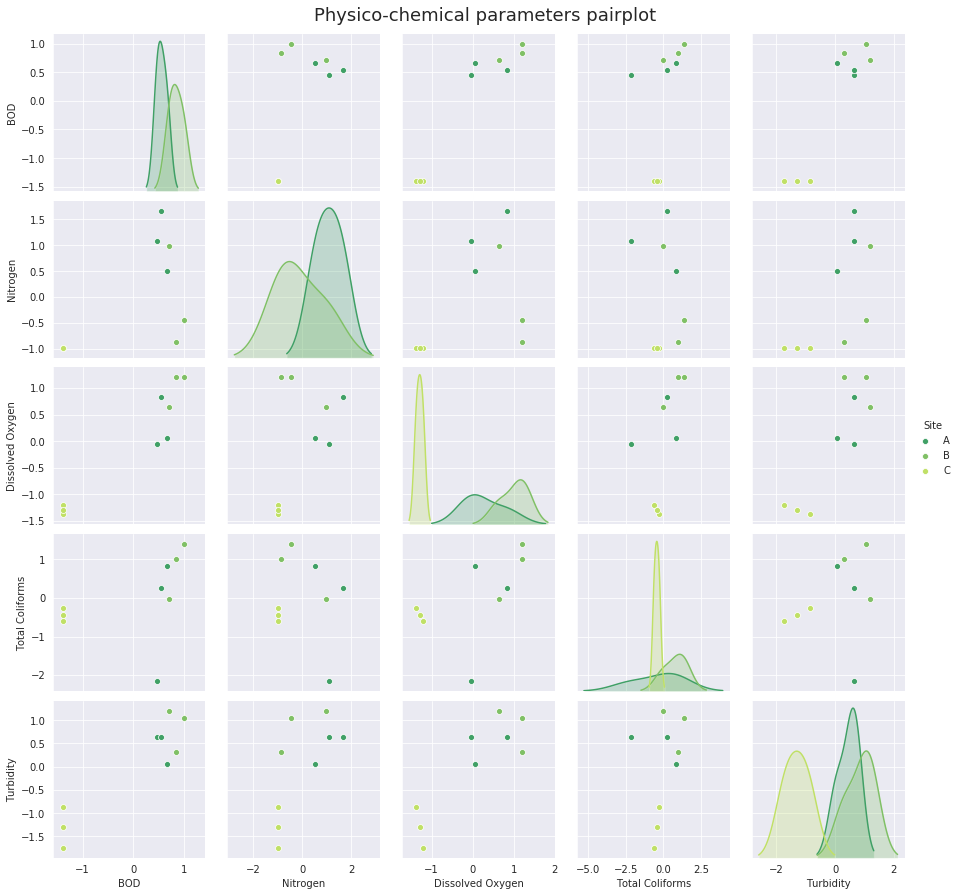

In [5]:
# Visualize the relationship between your variables with a pairplot
g = sns.pairplot(scaled_phychem, hue='Site', palette='summer')

# Add figure title
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Physico-chemical parameters pairplot', fontsize=18)

In [6]:
# Decompose data linearly in two components
pca = PCA(n_components=2)

# Fit model to data
pca_data = pca.fit_transform(scaled_phychem[num_columns])

# PCA DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'], index=scaled_phychem['Site'])

# Reset Index
pca_df = pca_df.reset_index().rename({'index': 'Site'}, axis=1)

Text(0.5, 1.0, 'Principal Component Analysis')

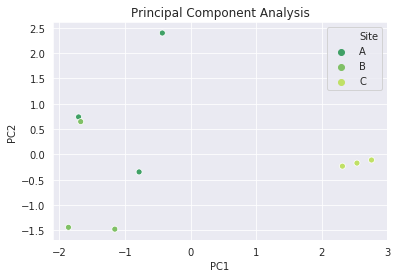

In [7]:
# Visualize data
h = sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Site', palette='summer')

# Set figure configuration
h.set_title('Principal Component Analysis')

# PC1 separates points A and B from point C.